# Titanic Machine Learning

## Load data

#### inspiration from https://github.com/glouppe/tutorials-scikit-learn/blob/master/1.%20An%20introduction%20to%20Machine%20Learning%20with%20Scikit-Learn.ipynb

In [27]:
import pandas as pd
import numpy as np
import sklearn

In [28]:
df_train = pd.read_csv('data/train.csv')
#df_train.set_index('PassengerId',inplace = True)
df_test = pd.read_csv('data/test.csv')
#df_test.set_index('PassengerId',inplace = True)

In [29]:
from sklearn.model_selection import train_test_split
df = df_train[['Pclass','Age','Fare','Survived']]
dfx = df.dropna(axis=0, how='any')
X = dfx[['Pclass','Age','Fare']]
y = dfx['Survived']

X=(X-X.mean())/X.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


#X_final_test = df_test[['Pclass','Age','Fare']]

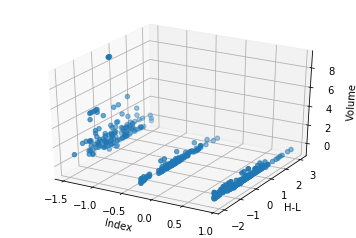

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

threedee = plt.figure().gca(projection='3d')
threedee.scatter(X_train['Pclass'], X_train['Age'], X_train['Fare'])
threedee.set_xlabel('Index')
threedee.set_ylabel('H-L')
threedee.set_zlabel('Volume')
plt.show()

## Fitting algorithms

### K-nearest neighbours

In [31]:
from sklearn.neighbors import KNeighborsClassifier                                                    

clf = KNeighborsClassifier(n_neighbors=5)

clf.fit(X_train, y_train)

from sklearn.metrics import zero_one_loss
print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Testing error =", zero_one_loss(y_test, clf.predict(X_test)))

Training error = 0.20560747663551404
Testing error = 0.34636871508379885


### Gaussian process

In [6]:
from sklearn.gaussian_process import GaussianProcessClassifier
clf = GaussianProcessClassifier()
clf.fit(X_train, y_train)

from sklearn.metrics import zero_one_loss
print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Testing error =", zero_one_loss(y_test, clf.predict(X_test)))

Training error = 0.2654205607476635
Testing error = 0.3072625698324022


### Multi-layer perceptron

In [7]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation="tanh", learning_rate="invscaling")
clf.fit(X_train, y_train)

from sklearn.metrics import zero_one_loss
print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Testing error =", zero_one_loss(y_test, clf.predict(X_test)))

Training error = 0.28598130841121494
Testing error = 0.33519553072625696


### Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=500)
# from sklearn.ensemble import ExtraTreesClassifier 
# clf = ExtraTreesClassifier(n_estimators=500)
clf.fit(X_train, y_train)

from sklearn.metrics import zero_one_loss
print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Testing error =", zero_one_loss(y_test, clf.predict(X_test)))

Training error = 0.024299065420560706
Testing error = 0.33519553072625696


### Support Vector Machine

In [12]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf")  # try kernel="rbf" instead
clf.fit(X_train, y_train)

from sklearn.metrics import zero_one_loss
print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Testing error =", zero_one_loss(y_test, clf.predict(X_test)))

Training error = 0.2654205607476635
Testing error = 0.33519553072625696


## Model evaluation

### Training and test error

In [32]:
from sklearn.metrics import zero_one_loss

print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Test error =", zero_one_loss(y_test, clf.predict(X_test)))

Training error = 0.20560747663551404
Test error = 0.34636871508379885


#### Cross-validation error

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y, 
                         cv=KFold(n_splits=5, random_state=42), 
                         scoring="accuracy")
print("CV error = %f +-%f" % (1. - np.mean(scores), np.std(scores)))

CV error = 0.326258 +-0.036078


### Default score (R)

In [36]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train) 
print("Default score =", clf.score(X_test, y_test))

Default score = 0.6536312849162011


### Accuracy

In [38]:
from sklearn.metrics import accuracy_score
print("Accuracy =", accuracy_score(y_test, clf.predict(X_test)))

Accuracy = 0.6536312849162011


### Precission, recall and F-score

In [39]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
print("Precision =", precision_score(y_test, clf.predict(X_test)))
print("Recall =", recall_score(y_test, clf.predict(X_test)))
print("F =", fbeta_score(y_test, clf.predict(X_test), beta=1))

Precision = 0.6
Recall = 0.5526315789473685
F = 0.5753424657534247


### Validation curve

In [47]:
from sklearn.model_selection import validation_curve

# Evaluate parameter range in CV
param_range = range(3, 200)
param_name = "Passengers"

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(n_neighbors=5), X, y, 
    param_name=param_name, 
    param_range=param_range, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot parameter VS estimated error
plt.xlabel(param_name)
plt.ylabel("score")
plt.xlim(min(param_range), max(param_range))
plt.plot(param_range, 1. - train_scores_mean, color="red", label="Training error")
plt.fill_between(param_range, 
                 1. - train_scores_mean + train_scores_std,
                 1. - train_scores_mean - train_scores_std,
                 alpha=0.2, color="red")
plt.plot(param_range, 1. - test_scores_mean, color="blue", label="CV error")
plt.fill_between(param_range, 
                 1. - test_scores_mean + test_scores_std,
                 1. - test_scores_mean - test_scores_std, 
                 alpha=0.2, color="blue")
plt.legend(loc="best")

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x7fbc84b2bc00, file "/...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/RocketRhubarb/miniconda3/lib/python3.6/sit...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/Rocket.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7fbc84b2bc00, file "/...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/RocketRhubarb/miniconda3/lib/python3.6/sit...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/Rocket.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         self.io_loop = ioloop.IOLoop.current()
    477         try:
--> 478             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    479         except KeyboardInterrupt:
    480             pass
    481 
    482 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.model_selection import validation_c... alpha=0.2, color="blue")\n#plt.legend(loc="best")', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 2, 11, 20, 38, 46, 605917, tzinfo=tzutc()), 'msg_id': 'a24da379df564ca4869ea1110af9ad5a', 'msg_type': 'execute_request', 'session': '07800d6c2bac422a8fd759dbdfbac1fe', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'a24da379df564ca4869ea1110af9ad5a', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'07800d6c2bac422a8fd759dbdfbac1fe']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.model_selection import validation_c... alpha=0.2, color="blue")\n#plt.legend(loc="best")', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 2, 11, 20, 38, 46, 605917, tzinfo=tzutc()), 'msg_id': 'a24da379df564ca4869ea1110af9ad5a', 'msg_type': 'execute_request', 'session': '07800d6c2bac422a8fd759dbdfbac1fe', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'a24da379df564ca4869ea1110af9ad5a', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'07800d6c2bac422a8fd759dbdfbac1fe'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.model_selection import validation_c... alpha=0.2, color="blue")\n#plt.legend(loc="best")', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 2, 11, 20, 38, 46, 605917, tzinfo=tzutc()), 'msg_id': 'a24da379df564ca4869ea1110af9ad5a', 'msg_type': 'execute_request', 'session': '07800d6c2bac422a8fd759dbdfbac1fe', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'a24da379df564ca4869ea1110af9ad5a', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='from sklearn.model_selection import validation_c... alpha=0.2, color="blue")\n#plt.legend(loc="best")', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'from sklearn.model_selection import validation_c... alpha=0.2, color="blue")\n#plt.legend(loc="best")'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('from sklearn.model_selection import validation_c... alpha=0.2, color="blue")\n#plt.legend(loc="best")',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('from sklearn.model_selection import validation_c... alpha=0.2, color="blue")\n#plt.legend(loc="best")',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from sklearn.model_selection import validation_c... alpha=0.2, color="blue")\n#plt.legend(loc="best")', store_history=True, silent=False, shell_futures=True)
   2723                 self.displayhook.exec_result = result
   2724 
   2725                 # Execute the user code
   2726                 interactivity = "none" if silent else self.ast_node_interactivity
   2727                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2728                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2729                 
   2730                 self.last_execution_succeeded = not has_raised
   2731                 self.last_execution_result = result
   2732 

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>], cell_name='<ipython-input-47-5ee161f74b3f>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7fbc40081240, executi..._before_exec=None error_in_exec=None result=None>)
   2845 
   2846         try:
   2847             for i, node in enumerate(to_run_exec):
   2848                 mod = ast.Module([node])
   2849                 code = compiler(mod, cell_name, "exec")
-> 2850                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7fbc41b8fe40, file "<ipython-input-47-5ee161f74b3f>", line 7>
        result = <ExecutionResult object at 7fbc40081240, executi..._before_exec=None error_in_exec=None result=None>
   2851                     return True
   2852 
   2853             for i, node in enumerate(to_run_interactive):
   2854                 mod = ast.Interactive([node])

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7fbc41b8fe40, file "<ipython-input-47-5ee161f74b3f>", line 7>, result=<ExecutionResult object at 7fbc40081240, executi..._before_exec=None error_in_exec=None result=None>)
   2905         outflag = True  # happens in more places, so it's easier as default
   2906         try:
   2907             try:
   2908                 self.hooks.pre_run_code_hook()
   2909                 #rprint('Running code', repr(code_obj)) # dbg
-> 2910                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7fbc41b8fe40, file "<ipython-input-47-5ee161f74b3f>", line 7>
        self.user_global_ns = {'Axes3D': <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>, 'In': ['', '#### inspiration from https://github.com/glouppe...%20Machine%20Learning%20with%20Scikit-Learn.ipynb', 'from sklearn.neural_network import MLPClassifier...r =", zero_one_loss(y_test, clf.predict(X_test)))', 'import pandas as pd\nimport numpy as np\nimport sklearn', "df_train = pd.read_csv('data/train.csv')\ndf_trai...)\ndf_test.set_index('PassengerId',inplace = True)", "from sklearn.model_selection import train_test_s...\n#X_final_test = df_test[['Pclass','Age','Fare']]", "get_ipython().run_line_magic('matplotlib', 'inli...l('H-L')\nthreedee.set_zlabel('Volume')\nplt.show()", 'from sklearn.neural_network import MLPClassifier...r =", zero_one_loss(y_test, clf.predict(X_test)))', 'from sklearn.metrics import zero_one_loss\n\nprint...r =", zero_one_loss(y_test, clf.predict(X_test)))', 'from sklearn.neighbors import KNeighborsClassifi...r =", zero_one_loss(y_test, clf.predict(X_test)))', 'from sklearn.metrics import zero_one_loss\n\nprint...r =", zero_one_loss(y_test, clf.predict(X_test)))', 'from sklearn.model_selection import KFold\n\nscore...r = %f +-%f" % (np.mean(scores), np.std(scores)))', "get_ipython().run_line_magic('pinfo', 'sklearn.model_selection.KFold')", 'from sklearn.model_selection import KFold\n\nscore...r = %f +-%f" % (np.mean(scores), np.std(scores)))', 'from sklearn.model_selection import KFold\n\nscore...r = %f +-%f" % (np.mean(scores), np.std(scores)))', 'from sklearn.model_selection import KFold\n\nscore...r = %f +-%f" % (np.mean(scores), np.std(scores)))', 'from sklearn.model_selection import KFold\n\nscore...r = %f +-%f" % (np.mean(scores), np.std(scores)))', 'from sklearn.model_selection import KFold\n\nscore...r = %f +-%f" % (np.mean(scores), np.std(scores)))', 'X', 'np.array(X)', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'MLPClassifier': <class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>, 'Out': {18:                Pclass       Age      Fare
Passen...10594  0.158392 -0.509166

[714 rows x 3 columns], 19: array([[ 0.91059403, -0.5300051 , -0.51861431],
...
       [ 0.91059403,  0.1583921 , -0.50916589]]), 22: array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,...1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0])}, 'PCA': <class 'sklearn.decomposition.pca.PCA'>, 'X':        Pclass       Age      Fare
0    0.910594 ...10594  0.158392 -0.509166

[714 rows x 3 columns], 'X_test':        Pclass       Age      Fare
423  0.910594 ...75329  0.502591  0.347805

[179 rows x 3 columns], 'X_train':        Pclass       Age      Fare
535 -0.282368 ...75329  1.053308  2.459842

[535 rows x 3 columns], ...}
        self.user_ns = {'Axes3D': <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>, 'In': ['', '#### inspiration from https://github.com/glouppe...%20Machine%20Learning%20with%20Scikit-Learn.ipynb', 'from sklearn.neural_network import MLPClassifier...r =", zero_one_loss(y_test, clf.predict(X_test)))', 'import pandas as pd\nimport numpy as np\nimport sklearn', "df_train = pd.read_csv('data/train.csv')\ndf_trai...)\ndf_test.set_index('PassengerId',inplace = True)", "from sklearn.model_selection import train_test_s...\n#X_final_test = df_test[['Pclass','Age','Fare']]", "get_ipython().run_line_magic('matplotlib', 'inli...l('H-L')\nthreedee.set_zlabel('Volume')\nplt.show()", 'from sklearn.neural_network import MLPClassifier...r =", zero_one_loss(y_test, clf.predict(X_test)))', 'from sklearn.metrics import zero_one_loss\n\nprint...r =", zero_one_loss(y_test, clf.predict(X_test)))', 'from sklearn.neighbors import KNeighborsClassifi...r =", zero_one_loss(y_test, clf.predict(X_test)))', 'from sklearn.metrics import zero_one_loss\n\nprint...r =", zero_one_loss(y_test, clf.predict(X_test)))', 'from sklearn.model_selection import KFold\n\nscore...r = %f +-%f" % (np.mean(scores), np.std(scores)))', "get_ipython().run_line_magic('pinfo', 'sklearn.model_selection.KFold')", 'from sklearn.model_selection import KFold\n\nscore...r = %f +-%f" % (np.mean(scores), np.std(scores)))', 'from sklearn.model_selection import KFold\n\nscore...r = %f +-%f" % (np.mean(scores), np.std(scores)))', 'from sklearn.model_selection import KFold\n\nscore...r = %f +-%f" % (np.mean(scores), np.std(scores)))', 'from sklearn.model_selection import KFold\n\nscore...r = %f +-%f" % (np.mean(scores), np.std(scores)))', 'from sklearn.model_selection import KFold\n\nscore...r = %f +-%f" % (np.mean(scores), np.std(scores)))', 'X', 'np.array(X)', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'MLPClassifier': <class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>, 'Out': {18:                Pclass       Age      Fare
Passen...10594  0.158392 -0.509166

[714 rows x 3 columns], 19: array([[ 0.91059403, -0.5300051 , -0.51861431],
...
       [ 0.91059403,  0.1583921 , -0.50916589]]), 22: array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,...1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0])}, 'PCA': <class 'sklearn.decomposition.pca.PCA'>, 'X':        Pclass       Age      Fare
0    0.910594 ...10594  0.158392 -0.509166

[714 rows x 3 columns], 'X_test':        Pclass       Age      Fare
423  0.910594 ...75329  0.502591  0.347805

[179 rows x 3 columns], 'X_train':        Pclass       Age      Fare
535 -0.282368 ...75329  1.053308  2.459842

[535 rows x 3 columns], ...}
   2911             finally:
   2912                 # Reset our crash handler in place
   2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:

...........................................................................
/home/RocketRhubarb/ScientificProgrammingInPython/titanic_machine_learning/<ipython-input-47-5ee161f74b3f> in <module>()
      5 param_name = "Passengers"
      6 
      7 train_scores, test_scores = validation_curve(
      8     KNeighborsClassifier(n_neighbors=5), X, y, 
      9     param_name=param_name, 
---> 10     param_range=param_range, cv=5, n_jobs=-1)
     11 
     12 #train_scores_mean = np.mean(train_scores, axis=1)
     13 #train_scores_std = np.std(train_scores, axis=1)
     14 #test_scores_mean = np.mean(test_scores, axis=1)

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in validation_curve(estimator=KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), X=       Pclass       Age      Fare
0    0.910594 ...10594  0.158392 -0.509166

[714 rows x 3 columns], y=array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,...1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0]), param_name='Passengers', param_range=range(3, 200), groups=None, cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False), scoring=None, n_jobs=-1, pre_dispatch='all', verbose=0)
   1306                         verbose=verbose)
   1307     out = parallel(delayed(_fit_and_score)(
   1308         clone(estimator), X, y, scorer, train, test, verbose,
   1309         parameters={param_name: v}, fit_params=None, return_train_score=True)
   1310         # NOTE do not change order of iteration to allow one time cv splitters
-> 1311         for train, test in cv.split(X, y, groups) for v in param_range)
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=5, random_state=None, shuffle=False)>
        X =        Pclass       Age      Fare
0    0.910594 ...10594  0.158392 -0.509166

[714 rows x 3 columns]
        y = array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,...1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0])
        groups = None
        param_range = range(3, 200)
   1312     out = np.asarray(out)
   1313     n_params = len(param_range)
   1314     n_cv_folds = out.shape[0] // n_params
   1315     out = out.reshape(n_cv_folds, n_params, 2).transpose((2, 1, 0))

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object validation_curve.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Sun Feb 11 21:38:46 2018
PID: 84             Python 3.6.4: /home/RocketRhubarb/miniconda3/bin/python
...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'),        Pclass       Age      Fare
0    0.910594 ...10594  0.158392 -0.509166

[714 rows x 3 columns], array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,...1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0]), <function _passthrough_scorer>, array([127, 128, 130, 131, 132, 134, 135, 136, 1...04, 705, 706, 707, 708, 709, 710, 711, 712, 713]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...51, 153, 154, 155, 156, 162, 165, 166, 167, 169]), 0), {'fit_params': None, 'parameters': {'Passengers': 3}, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'),        Pclass       Age      Fare
0    0.910594 ...10594  0.158392 -0.509166

[714 rows x 3 columns], array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,...1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0]), <function _passthrough_scorer>, array([127, 128, 130, 131, 132, 134, 135, 136, 1...04, 705, 706, 707, 708, 709, 710, 711, 712, 713]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...51, 153, 154, 155, 156, 162, 165, 166, 167, 169]), 0)
        kwargs = {'fit_params': None, 'parameters': {'Passengers': 3}, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), X=       Pclass       Age      Fare
0    0.910594 ...10594  0.158392 -0.509166

[714 rows x 3 columns], y=array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,...1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0]), scorer=<function _passthrough_scorer>, train=array([127, 128, 130, 131, 132, 134, 135, 136, 1...04, 705, 706, 707, 708, 709, 710, 711, 712, 713]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ...51, 153, 154, 155, 156, 162, 165, 166, 167, 169]), verbose=0, parameters={'Passengers': 3}, fit_params={}, return_train_score=True, return_parameters=False, return_n_test_samples=False, return_times=False, error_score='raise')
    439                       for k, v in fit_params.items()])
    440 
    441     test_scores = {}
    442     train_scores = {}
    443     if parameters is not None:
--> 444         estimator.set_params(**parameters)
        estimator.set_params = <bound method BaseEstimator.set_params of KNeigh..._neighbors=5, p=2,
           weights='uniform')>
        parameters = {'Passengers': 3}
    445 
    446     start_time = time.time()
    447 
    448     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
/home/RocketRhubarb/miniconda3/lib/python3.6/site-packages/sklearn/base.py in set_params(self=KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform'), **params={'Passengers': 3})
    269             key, delim, sub_key = key.partition('__')
    270             if key not in valid_params:
    271                 raise ValueError('Invalid parameter %s for estimator %s. '
    272                                  'Check the list of available parameters '
    273                                  'with `estimator.get_params().keys()`.' %
--> 274                                  (key, self))
        key = 'Passengers'
        self = KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=5, p=2,
           weights='uniform')
    275 
    276             if delim:
    277                 nested_params[key][sub_key] = value
    278             else:

ValueError: Invalid parameter Passengers for estimator KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'). Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________

In [42]:
?sklearn.model_selection.validation_curve